In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
X_train = pd.read_csv('soan_basin.csv', index_col=None)
X_train.columns = [['date','basin']]

In [3]:
X_train_np = np.array(X_train)

In [4]:
X_train_pd = pd.DataFrame(X_train_np)

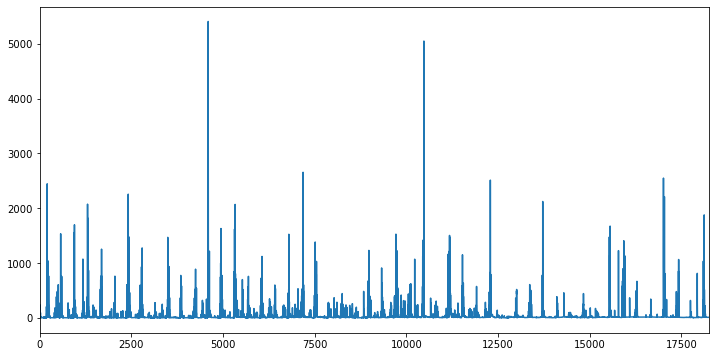

In [5]:
X_train_pd.columns = ['date','basin']
X_train_pd['basin'].plot(figsize=(12,6))

Kurtosis of normal distribution: 314.99823914085533
Skewness of normal distribution: 13.230368480324241


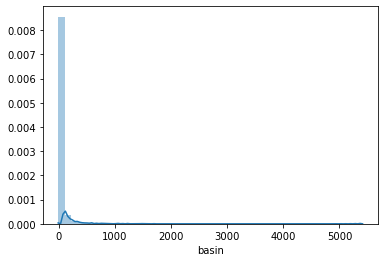

In [6]:
sns.distplot(X_train_pd.basin);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(X_train_pd.basin)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(X_train_pd.basin)))

,count,unique,top,freq
date,18262,18262,1.3.1977,1
basin,18264,1265,8,936


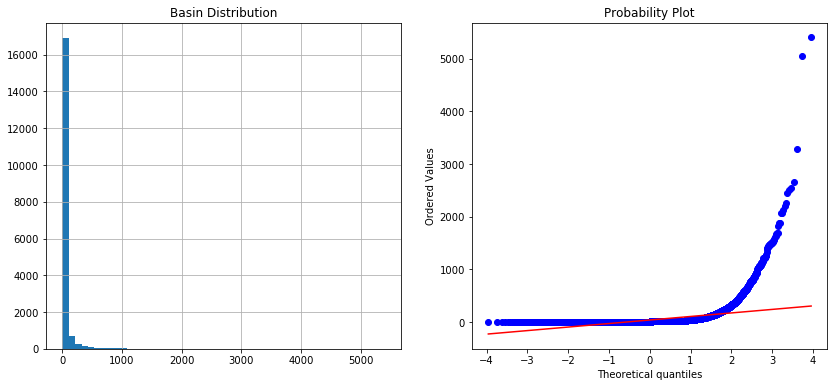

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
X_train_pd['basin'].hist(bins=50)
plt.title('Basin Distribution')
plt.subplot(1,2,2)
stats.probplot(X_train_pd['basin'].astype(float), plot=plt);
df1=X_train_pd.loc[:,['date','basin']]
df1.describe().T

In [15]:
test = sm.tsa.adfuller(X_train_pd['basin'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -15.936538519340521
p-value:  7.624502853261705e-29
Critical values:  {'1%': -3.430708997784375, '5%': -2.861698663548587, '10%': -2.566854452420033}
единичных корней нет, ряд стационарен


In [21]:
otg1diff = X_train_pd['basin'].astype(float).diff(periods=5).dropna()

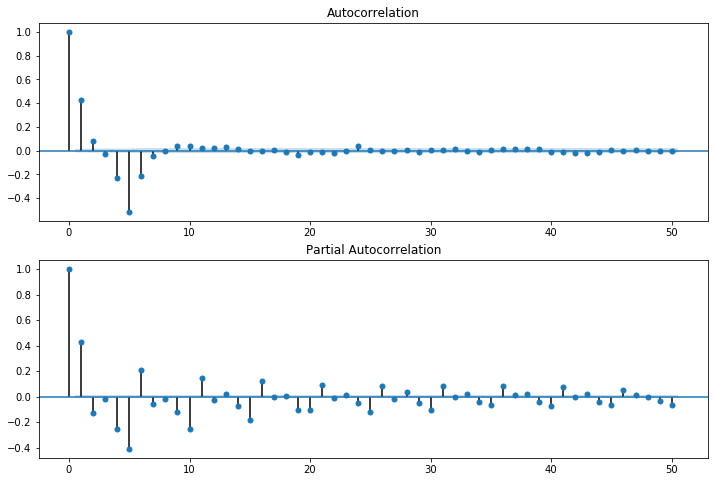

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=50, ax=ax2)